In [3]:
!unzip Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/OKKCEF9K4K64.jpg  
  in

In [4]:
pip install tensorflow

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize image pixels
    rotation_range=20,       # Rotate images randomly (0–20 degrees)
    width_shift_range=0.2,   # Shift image horizontally by 20%
    height_shift_range=0.2,  # Shift image vertically by 20%
    zoom_range=0.2,          # Random zoom
    shear_range=0.2,         # Shear angle
    horizontal_flip=True,    # Flip image horizontally
    validation_split=0.2     # 20% data for validation
)
valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_data = train_datagen.flow_from_directory("/content/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    target_size=(256, 256),   
    batch_size=32,
    class_mode='categorical',  # multi-class classification
)
valid_data = valid_datagen.flow_from_directory("/content/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
)
print("Class Labels:", train_data.class_indices)



Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Class Labels: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [8]:
print(train_data.samples)
print(valid_data.samples)
print(train_data.image_shape)


6225
1092
(256, 256, 3)


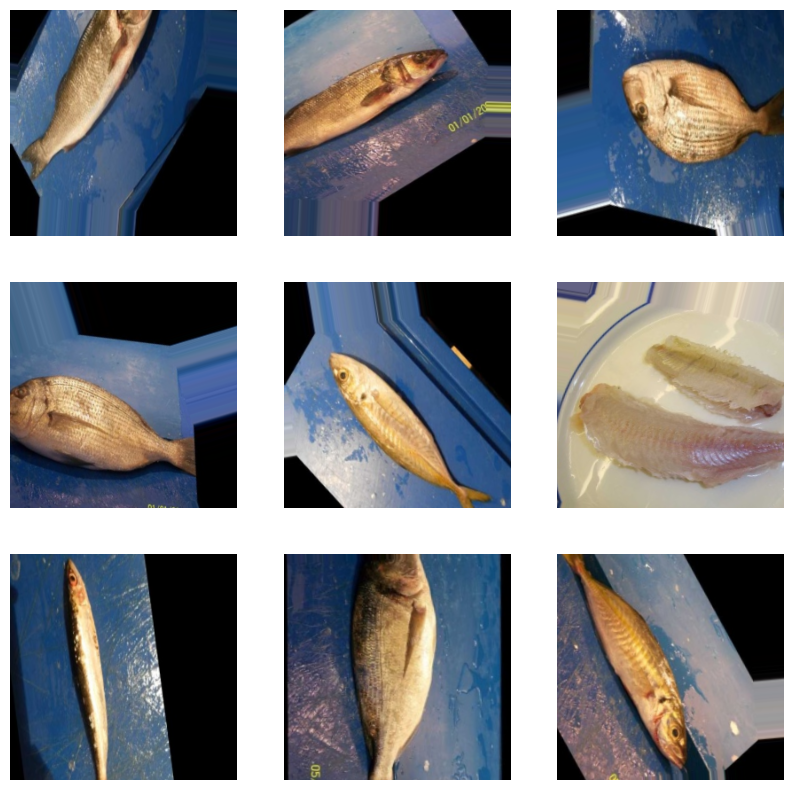

In [9]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")

plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu", input_shape=(256,256,3))) #input

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Flatten()) #Converting the matrix values into single column

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.5)) #to control overfitting

model.add(Dense(train_data.num_classes, activation="softmax")) #output

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
pip install scipy

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,395 (56.61 MB)

 Trainable params: 14,840,395 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,              
    validation_data=valid_data,  
    epochs=12
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 551ms/step - accuracy: 0.2088 - loss: 2.2929 - val_accuracy: 0.4634 - val_loss: 1.7130
Epoch 2/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 511ms/step - accuracy: 0.3995 - loss: 1.6860 - val_accuracy: 0.5595 - val_loss: 1.2470
Epoch 3/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 505ms/step - accuracy: 0.4607 - loss: 1.4543 - val_accuracy: 0.5971 - val_loss: 1.0981
Epoch 4/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 503ms/step - accuracy: 0.5084 - loss: 1.2973 - val_accuracy: 0.7509 - val_loss: 0.7876
Epoch 5/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 503ms/step - accuracy: 0.6021 - loss: 1.0336 - val_accuracy: 0.7353 - val_loss: 0.6945
Epoch 6/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 507ms/step - accuracy: 0.6544 - loss: 0.9139 - val_accuracy: 0.7225 - val_loss: 0.7045
Epoch 7/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 504ms/step - accuracy: 0.7098 - loss: 0.7866 - val_accuracy: 0.7363 - val_loss: 0.7190
Epoch 8/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 503ms/step - accuracy: 0.7300 - loss:

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    r"/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [21]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8931 - loss: 0.3116
Test Loss: 0.3634
Test Accuracy: 0.8748


In [22]:
from sklearn.metrics import classification_report

y_probs = model.predict(test_data)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report of CNN:\n", report)

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step
Classification Report of CNN:
                                   precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.96      0.93      0.94       298
   fish sea_food gilt_head_bream       0.89      0.45      0.60       305
   fish sea_food hourse_mackerel       0.89      0.95      0.92       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       0.64      0.90      0.75       273
          fish sea_food sea_bass       0.86      0.67      0.75       327
            fish sea_food shrimp       0.85      1.00      0.92       289
fish sea_food striped_red_mullet       0.77      0.85      0.81       293
             fish sea_food trout       0.94      0.99      0.96       292

                        accuracy     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix of CNN:\n", cm)

Confusion Matrix of CNN:
 [[517   0   2   1   0   0   0   0   0   0   0]
 [ 11   0   0   1   1   0   0   0   0   0   0]
 [  0   0 277   0  16   0   0   0   0   5   0]
 [  1   0   0 138   2   0 104  25   0  16  19]
 [  0   0   5   0 273   0   0   0   6   2   0]
 [  0   0   0   0   0 291   0   0   0   0   0]
 [  0   0   1   0   6   0 247  11   0   8   0]
 [  0   0   5  15   8   0  35 219   0  45   0]
 [  0   0   0   0   0   0   0   0 289   0   0]
 [  0   0   0   0   0   0   0   0  44 249   0]
 [  0   0   0   0   2   0   2   0   0   0 288]]


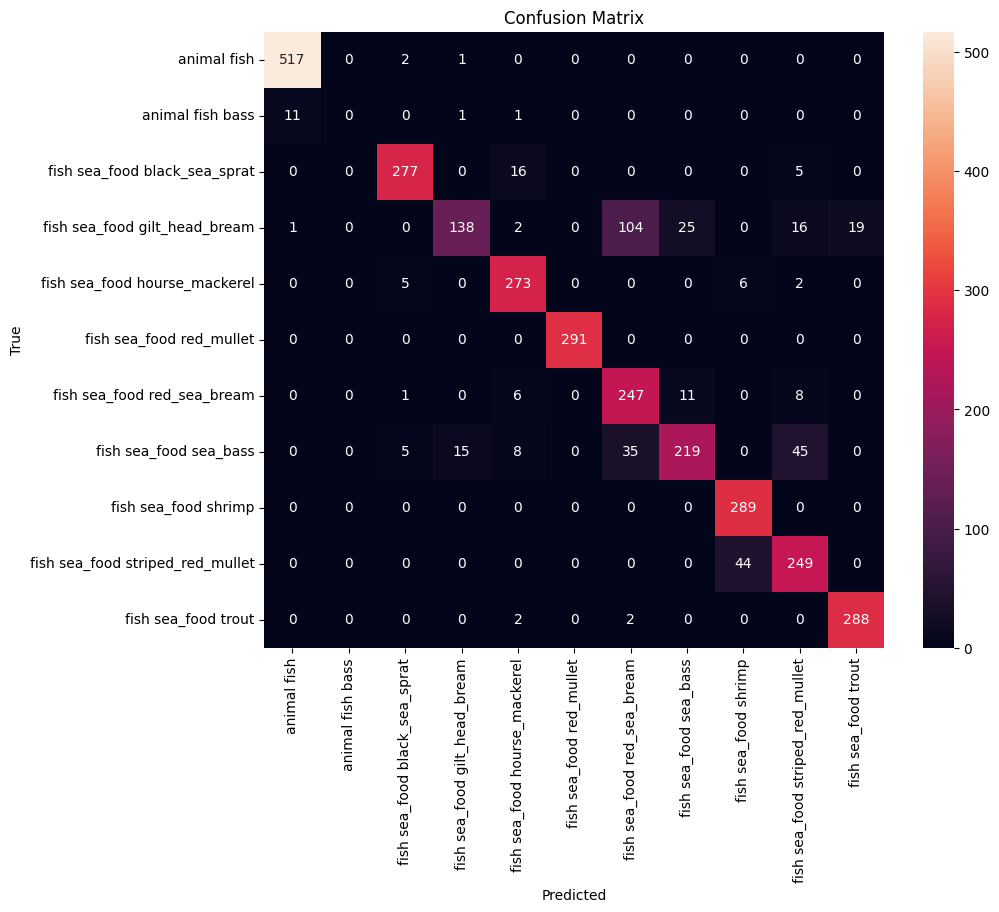

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

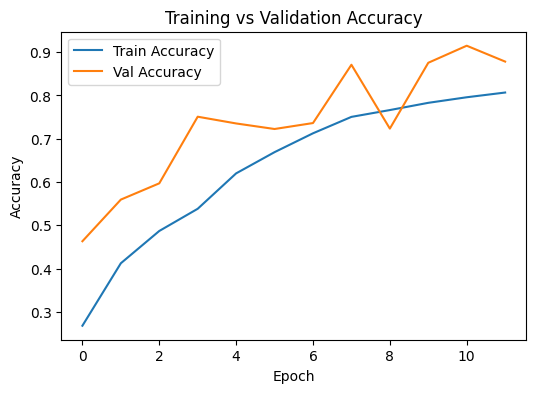

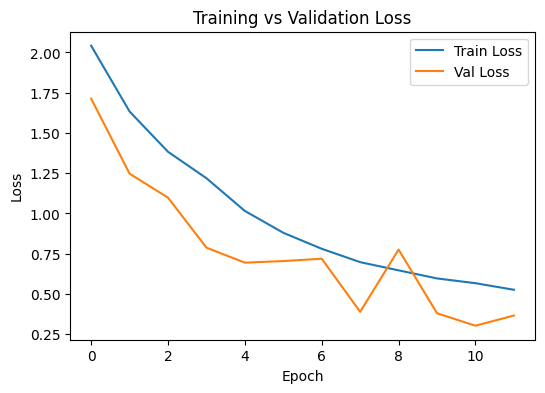

In [25]:
# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [26]:
model.save("CNN.h5")

In [28]:
import pickle

class_labels = list(train_data.class_indices.keys())

with open("fish_classes_CNN.pkl", "wb") as f:
    pickle.dump(class_labels, f)

In [29]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = r"/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat/00JL3HEP2KW2.jpg"
img = load_img(img_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)
pred_prob = model.predict(img_array)
pred_class = np.argmax(pred_prob)
class_labels = list(train_data.class_indices.keys())
result = class_labels[pred_class]

print("Predicted Fish Category:", result)
print("Confidence Score:", np.max(pred_prob))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Fish Category: fish sea_food black_sea_sprat
Confidence Score: 0.635017


In [30]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load base model (exclude top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_model.trainable = False  

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save only best model
checkpoint = ModelCheckpoint('vgg16_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train
history_vgg16 = model_vgg16.fit(
    train_data,
    validation_data=valid_data,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.1355 - loss: 2.5134

195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 755ms/step - accuracy: 0.1358 - loss: 2.5126 - val_accuracy: 0.3718 - val_loss: 2.0304
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.2861 - loss: 2.0619

195/195 ━━━━━━━━━━━━━━━━━━━━ 127s 652ms/step - accuracy: 0.2863 - loss: 2.0617 - val_accuracy: 0.4982 - val_loss: 1.8306
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.3798 - loss: 1.8719

195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 611ms/step - accuracy: 0.3799 - loss: 1.8717 - val_accuracy: 0.5934 - val_loss: 1.6787
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.4645 - loss: 1.6997

195/195 ━━━━━━━━━━━━━━━━━━━━ 116s 594ms/step - accuracy: 0.4646 - loss: 1.6996 - val_accuracy: 0.6777 - val_loss: 1.5522
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 117s 598ms/step - accuracy: 0.5389 - loss: 1.5838 - val_accuracy: 0.6685 - val_loss: 1.4389


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.16      0.18      0.17       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.12      0.09      0.10       105
   fish sea_food gilt_head_bream       0.11      0.01      0.02        94
   fish sea_food hourse_mackerel       0.06      0.16      0.09        97
        fish sea_food red_mullet       0.09      0.11      0.10        90
     fish sea_food red_sea_bream       0.09      0.09      0.09       113
          fish sea_food sea_bass       0.06      0.03      0.04        97
            fish sea_food shrimp       0.10      0.11      0.10       100
fish sea_food striped_red_mullet       0.12      0.07      0.09       101
             fish sea_food trout       0.05      0.05      0.05        98

                        accuracy                           0.10      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


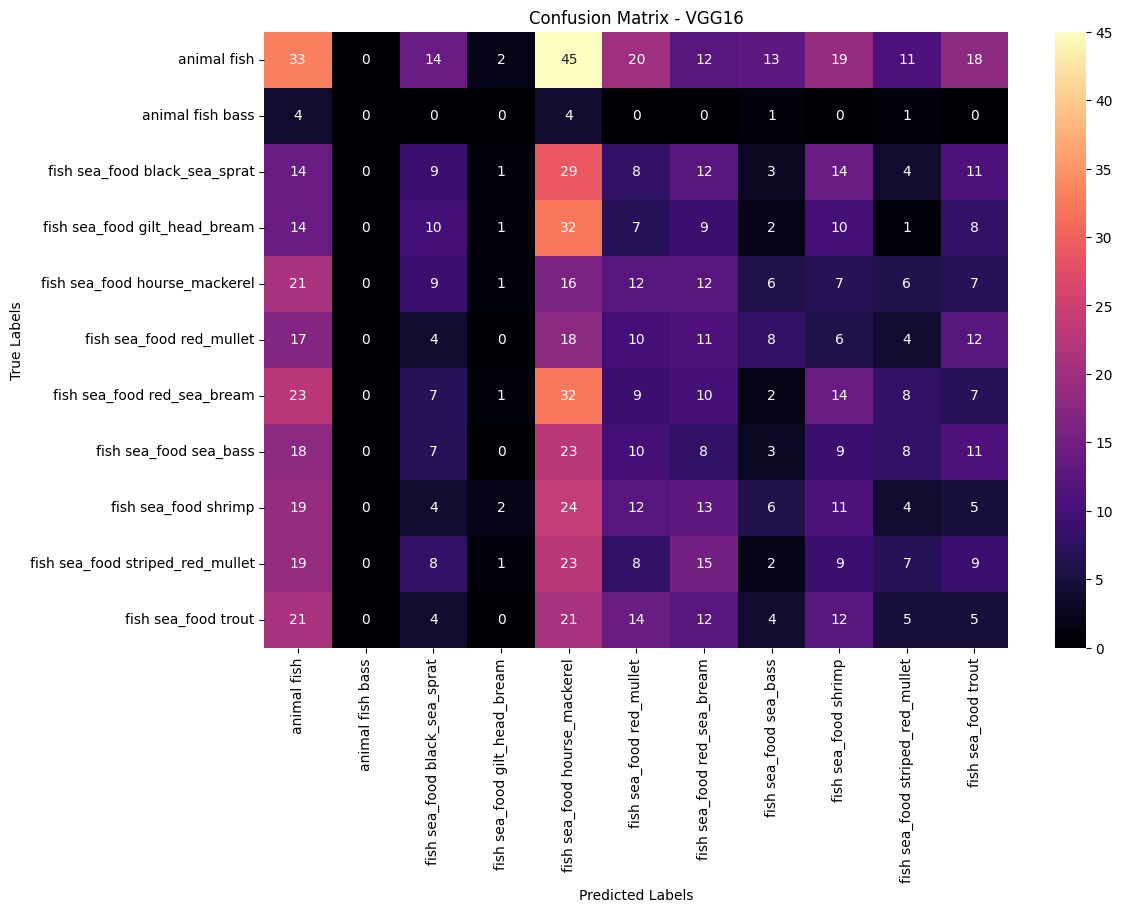

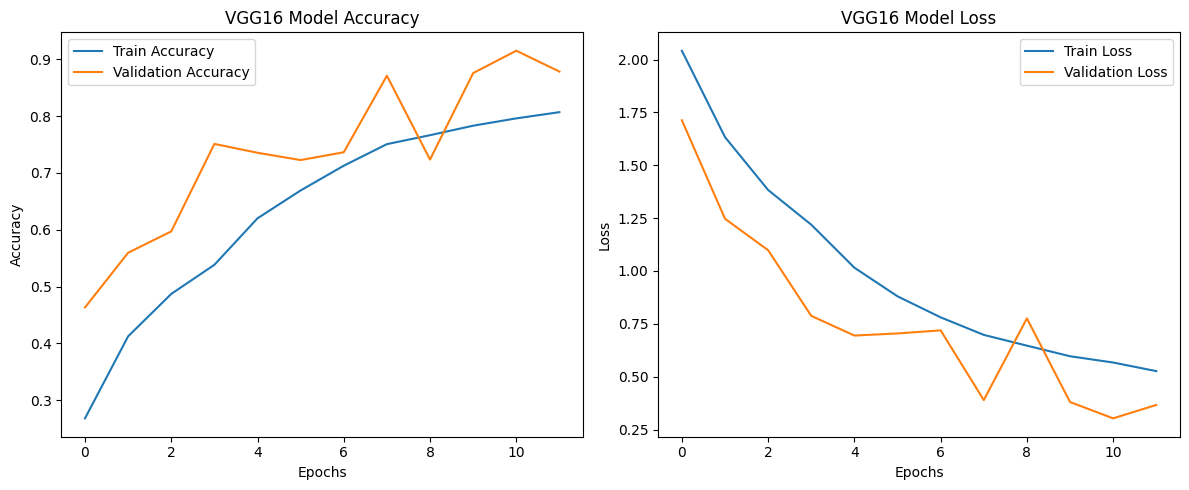

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

#  Predict
y_pred_probs = model_vgg16.predict(valid_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = valid_data.classes

#  Class Labels
class_labels = list(valid_data.class_indices.keys())

#  Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix with seaborn
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_model.trainable = False  # Freeze base layers

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11, activation='softmax')(x)

# Final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


checkpoint = ModelCheckpoint('resnet50_best.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

# Train the model (train_generator and val_generator should be defined before)
history_resnet50 = model_resnet50.fit(
    train_data,
    validation_data=valid_data,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)

loss, accuracy = model_resnet50.evaluate(valid_data)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_resnet50.evaluate(test_data)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.1329 - loss: 2.5259

195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 603ms/step - accuracy: 0.1330 - loss: 2.5252 - val_accuracy: 0.1712 - val_loss: 2.2868
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 527ms/step - accuracy: 0.1839 - loss: 2.2881 - val_accuracy: 0.1712 - val_loss: 2.2464
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 527ms/step - accuracy: 0.1864 - loss: 2.2554 - val_accuracy: 0.1676 - val_loss: 2.2193
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 525ms/step - accuracy: 0.1726 - loss: 2.2381 - val_accuracy: 0.1667 - val_loss: 2.1971
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.1538 - loss: 2.3012 
Final Validation Accuracy: 17.12%
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.4507 - loss: 2.0191
Final Validation Accuracy: 16.32%


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy                           0.16   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


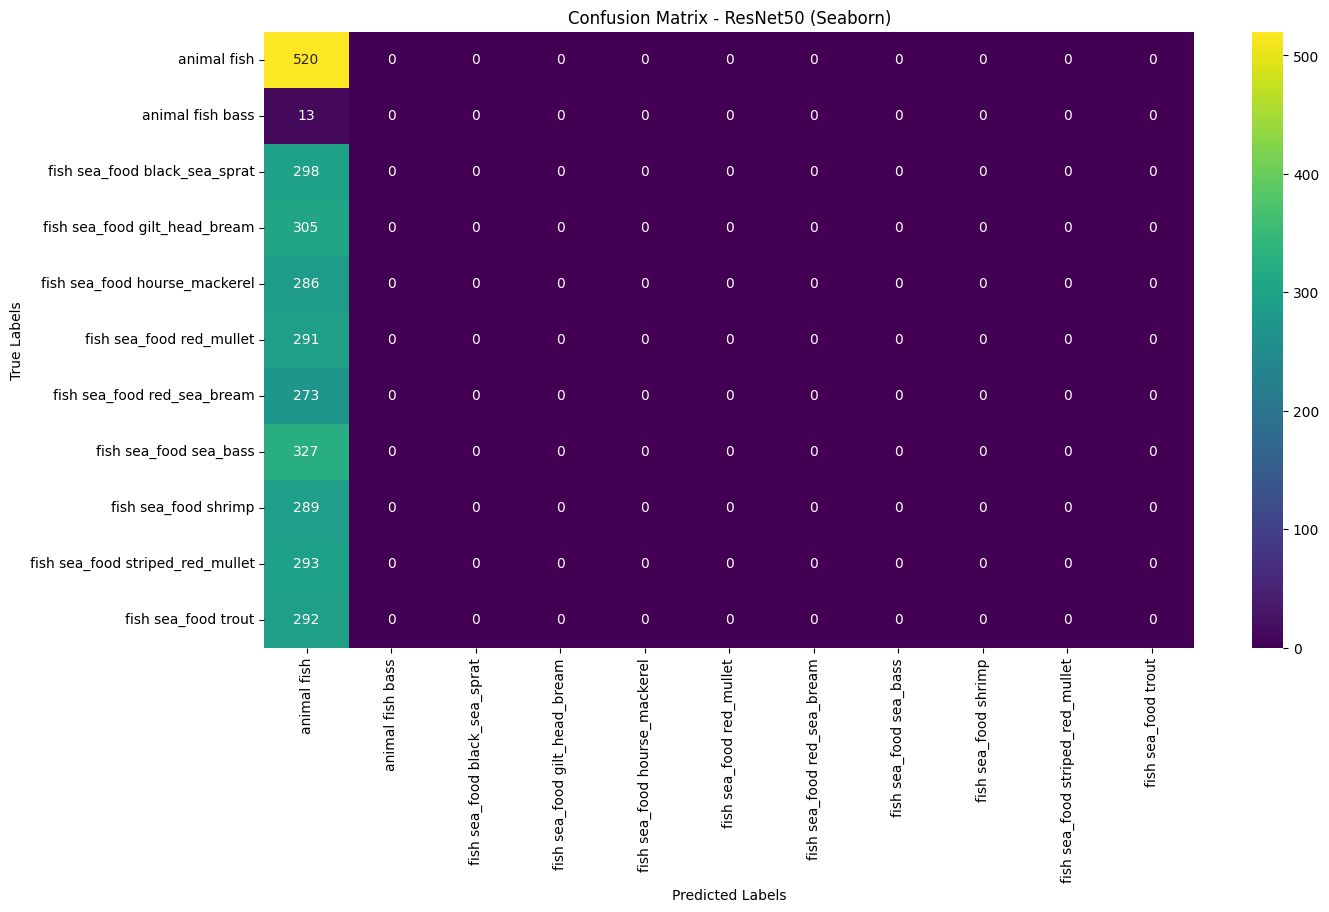

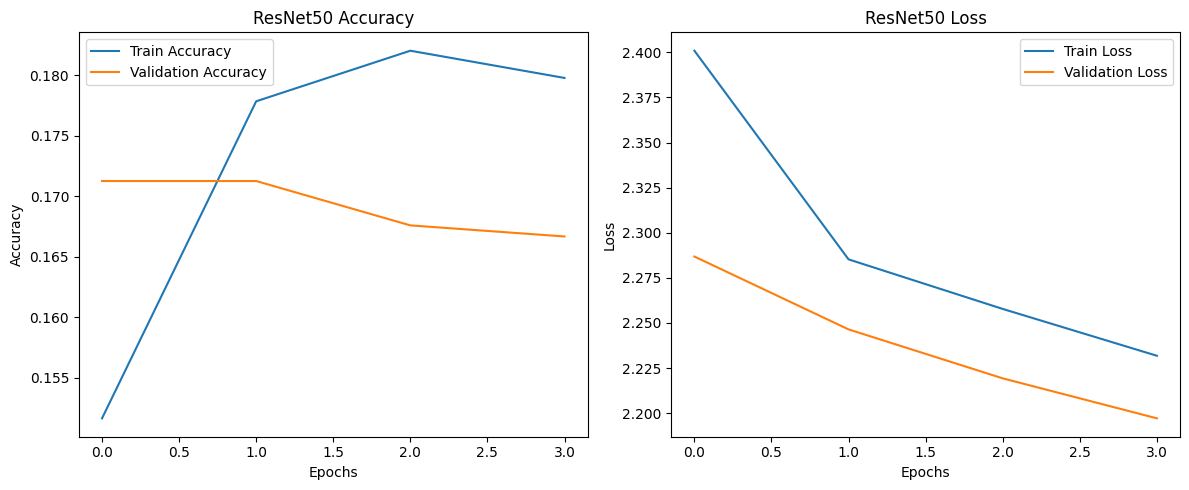

In [34]:
y_pred_probs = model_resnet50.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes

# ✅ Class labels
class_labels = list(test_data.class_indices.keys())

# ✅ Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ✅ Confusion Matrix - Heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - ResNet50 (Seaborn)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_mobile.trainable = False  

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(11, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                      metrics=['accuracy'])

checkpoint_mobile = ModelCheckpoint("best_mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_data,
    validation_data=valid_data,
    epochs=5,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)
loss, accuracy = model_mobile.evaluate(valid_data)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_mobile.evaluate(test_data)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

/tmp/ipython-input-2182199901.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.7586 - loss: 0.8084

195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 602ms/step - accuracy: 0.7593 - loss: 0.8062 - val_accuracy: 0.9789 - val_loss: 0.1000
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.9761 - loss: 0.0780

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 489ms/step - accuracy: 0.9761 - loss: 0.0779 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9849 - loss: 0.0503

195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step - accuracy: 0.9849 - loss: 0.0503 - val_accuracy: 0.9973 - val_loss: 0.0203
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 488ms/step - accuracy: 0.9949 - loss: 0.0293 - val_accuracy: 0.9936 - val_loss: 0.0186
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.9927 - loss: 0.0263 - val_accuracy: 0.9973 - val_loss: 0.0139
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9989 - loss: 0.0176
Final Validation Accuracy: 99.73%
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.9965 - loss: 0.0160
Final Test Accuracy: 99.62%


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step
                                  precision    recall  f1-score   support

                     animal fish       1.00      1.00      1.00       520
                animal fish bass       0.92      0.85      0.88        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       0.99      1.00      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.98      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00    

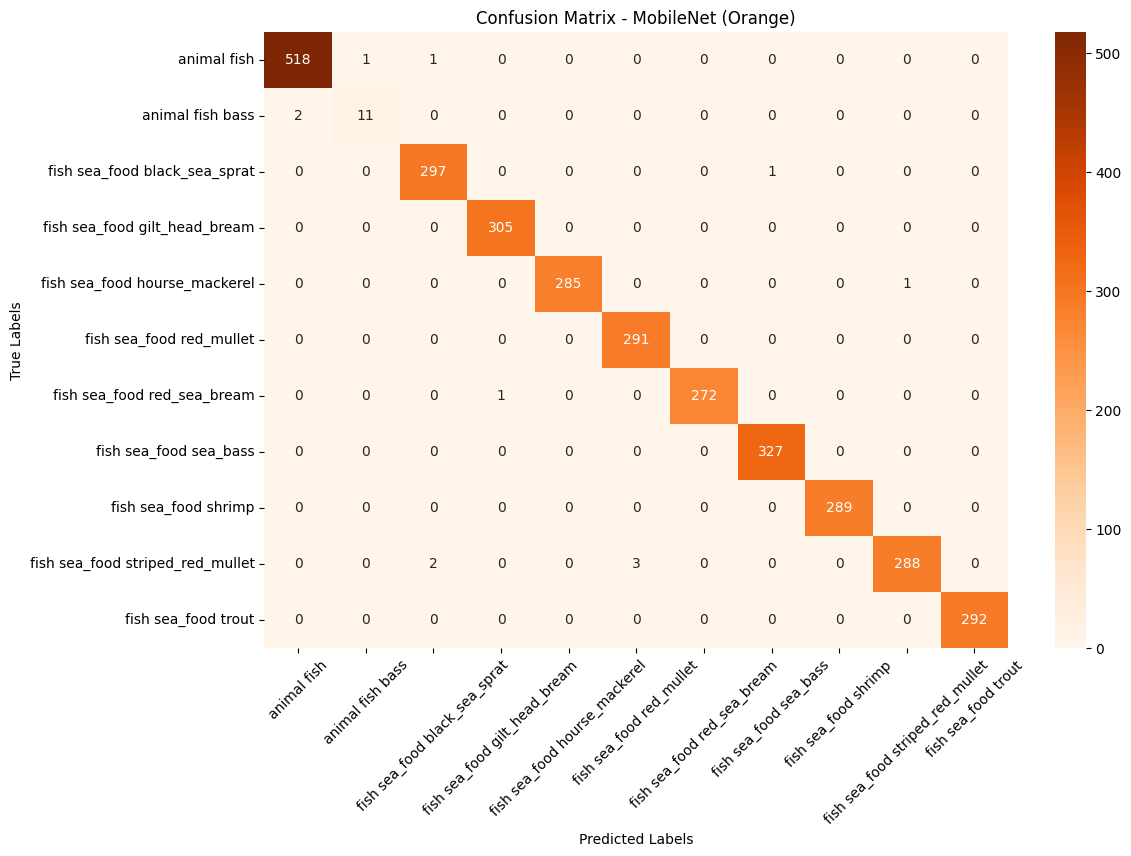

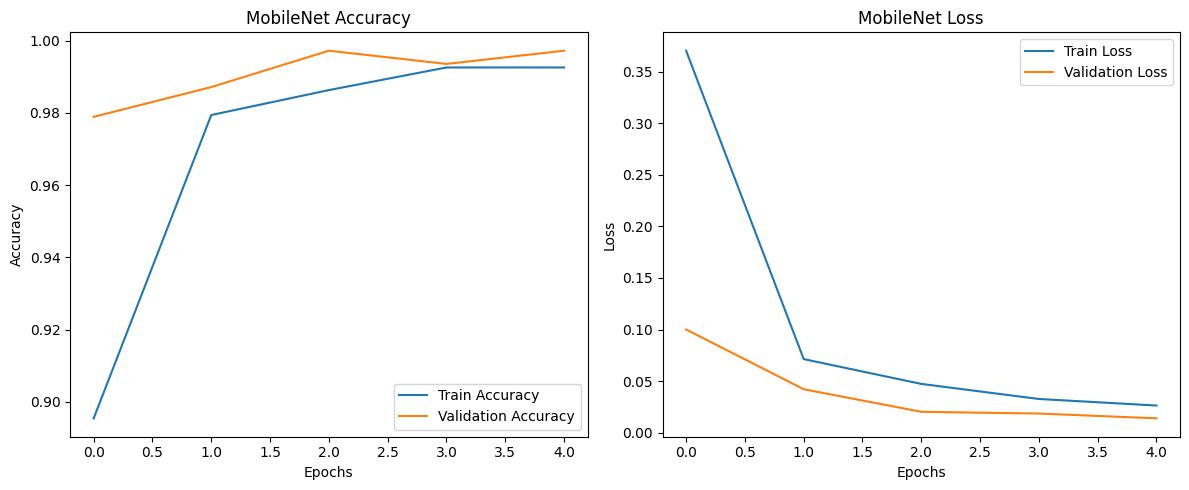

In [36]:
y_pred_probs_mobilenet = model_mobile.predict(test_data)
y_pred_mobilenet = np.argmax(y_pred_probs_mobilenet, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# ✅ Classification Report (printed)
report = classification_report(y_true, y_pred_mobilenet, target_names=class_labels, output_dict=True)
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

# ✅ Confusion Matrix Heatmap with ORANGE color
cm = confusion_matrix(y_true, y_pred_mobilenet)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MobileNet (Orange)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_inception.trainable = False  

# Add new custom classification head
x = base_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(11, activation='softmax')(x)

model_inception = Model(inputs=base_inception.input, outputs=output)
model_inception.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Save the best model only & stop early if no improvement
checkpoint_inception = ModelCheckpoint('inception_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history_inception = model_inception.fit(train_data, validation_data=valid_data, epochs=5,
                                        callbacks=[checkpoint_inception, early_stop_inception])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.4084 - loss: 1.7873

195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 620ms/step - accuracy: 0.4092 - loss: 1.7849 - val_accuracy: 0.8617 - val_loss: 0.5703
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.7941 - loss: 0.6623

195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 516ms/step - accuracy: 0.7943 - loss: 0.6619 - val_accuracy: 0.9286 - val_loss: 0.3296
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.8678 - loss: 0.4424

195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 517ms/step - accuracy: 0.8678 - loss: 0.4423 - val_accuracy: 0.9405 - val_loss: 0.2489
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8942 - loss: 0.3700

195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 525ms/step - accuracy: 0.8942 - loss: 0.3699 - val_accuracy: 0.9423 - val_loss: 0.2057
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9111 - loss: 0.3054

195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 518ms/step - accuracy: 0.9111 - loss: 0.3054 - val_accuracy: 0.9560 - val_loss: 0.1731


In [38]:
loss, accuracy = model_inception.evaluate(valid_data)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_inception.evaluate(test_data)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9638 - loss: 0.1478
Final Validation Accuracy: 95.60%
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.9674 - loss: 0.1403
Final Test Accuracy: 96.36%


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step
===== Classification Report: InceptionV3 =====
                                  precision    recall  f1-score   support

                     animal fish       0.96      0.98      0.97       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      0.96      0.97       298
   fish sea_food gilt_head_bream       0.93      0.97      0.95       305
   fish sea_food hourse_mackerel       0.96      0.99      0.97       286
        fish sea_food red_mullet       0.96      0.95      0.96       291
     fish sea_food red_sea_bream       0.97      0.99      0.98       273
          fish sea_food sea_bass       0.96      0.94      0.95       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.93      0.91      0.92       293
             fish sea_food trout       0.97      0.97      0.97       292

                   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


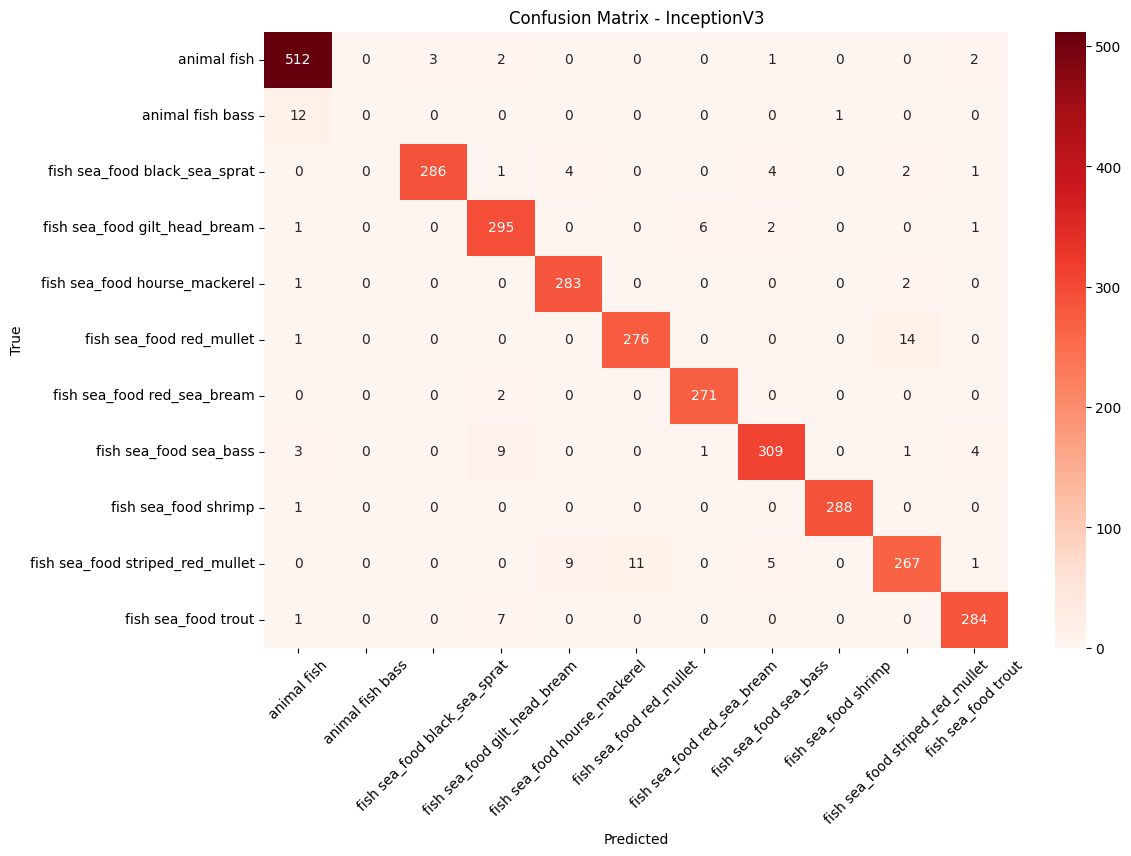

In [39]:
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Predictions for  models
y_pred_inception = np.argmax(model_inception.predict(test_data), axis=1)


# Print detailed metrics
print("===== Classification Report: InceptionV3 =====")
print(classification_report(y_true, y_pred_inception, target_names=class_labels))



# --- Step 5: Confusion Matrix Plot with seaborn (clear, color-coded) ---
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                 xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.show()

# Generate confusion matrices
cm_inception = confusion_matrix(y_true, y_pred_inception)


plot_confusion_matrix(cm_inception, class_labels, "Confusion Matrix - InceptionV3")

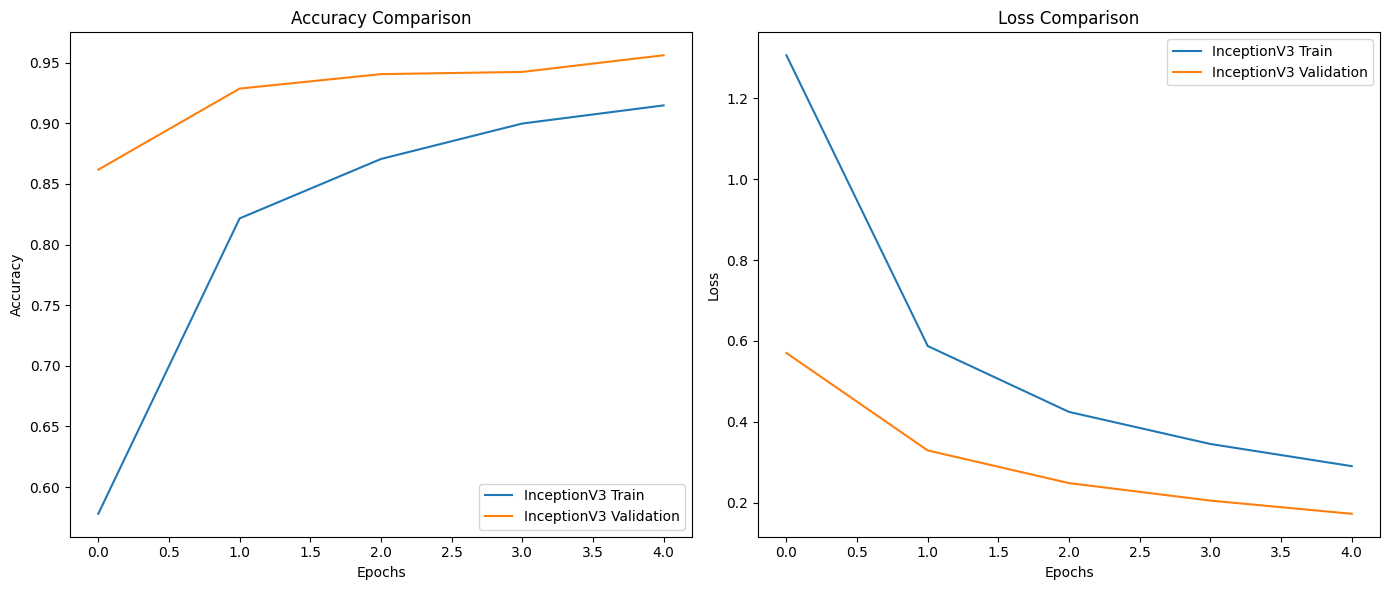

In [40]:
plt.figure(figsize=(14,6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_accuracy'], label='InceptionV3 Validation')

plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_loss'], label='InceptionV3 Validation')

plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# EfficientNetB0 base
base_efficient = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_efficient.trainable = False

# Custom top layers
x = base_efficient.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)

model_efficient = Model(inputs=base_efficient.input, outputs=output)

model_efficient.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_efficient = ModelCheckpoint('efficient_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_efficient = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_efficient = model_efficient.fit(
    train_data,
    validation_data=valid_data,
    epochs=5,
    callbacks=[checkpoint_efficient, early_stop_efficient]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.1340 - loss: 2.3678

195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 675ms/step - accuracy: 0.1341 - loss: 2.3676 - val_accuracy: 0.1712 - val_loss: 2.3115
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 504ms/step - accuracy: 0.1703 - loss: 2.3173 - val_accuracy: 0.1712 - val_loss: 2.3123
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 497ms/step - accuracy: 0.1705 - loss: 2.3229 - val_accuracy: 0.1712 - val_loss: 2.3097
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 493ms/step - accuracy: 0.1703 - loss: 2.3154 - val_accuracy: 0.1712 - val_loss: 2.3106


In [43]:
loss, accuracy = model_efficient.evaluate(valid_data)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_efficient.evaluate(test_data)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.1654 - loss: 2.3111
Final Validation Accuracy: 17.12%
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.4507 - loss: 2.1385
Final Test Accuracy: 16.32%


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step
===== Classification Report: EfficientNetB0 =====
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


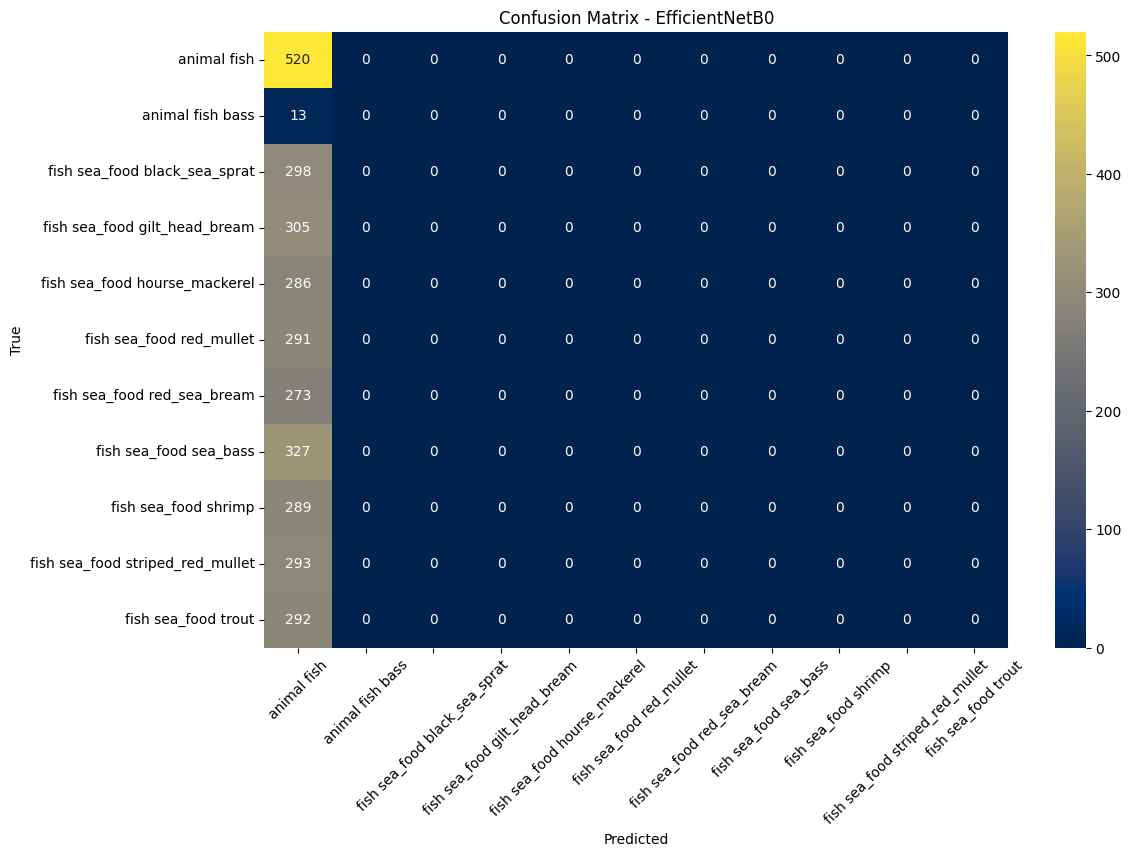

In [44]:
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Predictions for both models

y_pred_efficient = np.argmax(model_efficient.predict(test_data), axis=1)

# Print detailed metrics

print("===== Classification Report: EfficientNetB0 =====")
print(classification_report(y_true, y_pred_efficient, target_names=class_labels))


# --- Step 5: Confusion Matrix Plot with seaborn (clear, color-coded) ---
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.show()

# Generate confusion matrices

cm_efficient = confusion_matrix(y_true, y_pred_efficient)

plot_confusion_matrix(cm_efficient, class_labels, "Confusion Matrix - EfficientNetB0")

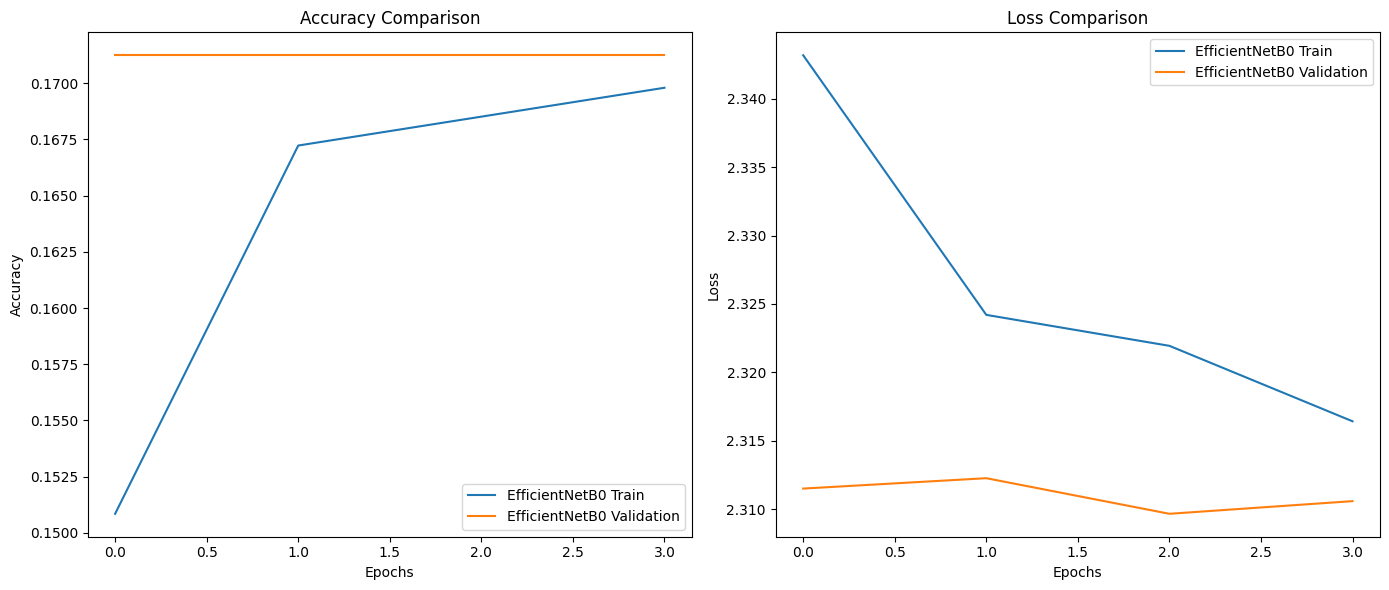

In [45]:
# --- Step 6: Training History Visualization (Accuracy & Loss) ---
plt.figure(figsize=(14,6))

# Plot Accuracy
plt.subplot(1, 2, 1)

plt.plot(history_efficient.history['accuracy'], label='EfficientNetB0 Train')
plt.plot(history_efficient.history['val_accuracy'], label='EfficientNetB0 Validation')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)

plt.plot(history_efficient.history['loss'], label='EfficientNetB0 Train')
plt.plot(history_efficient.history['val_loss'], label='EfficientNetB0 Validation')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
from tensorflow.keras.models import load_model

# Load saved best models
vgg_best        = load_model('vgg16_model.h5')
resnet_best     = load_model('resnet50_best.h5')
mobile_best     = load_model('best_mobilenet_model.h5')
inception_best  = load_model('inception_best.h5')
efficient_best  = load_model('efficient_best.h5')

models = {
    "VGG16"       : vgg_best,
    "ResNet50"    : resnet_best,
    "MobileNet"   : mobile_best,
    "InceptionV3" : inception_best,
    "EfficientNetB0": efficient_best
}

results = {}

for name, model in models.items():
    loss, acc = model.evaluate(test_data, verbose=0)
    results[name] = {"test_loss": loss, "test_acc": acc}
    print(f"{name} -> Test Accuracy: {acc*100:.2f}%, Test Loss: {loss:.4f}")


VGG16 -> Test Accuracy: 69.41%, Test Loss: 1.5318
ResNet50 -> Test Accuracy: 16.32%, Test Loss: 2.2811
MobileNet -> Test Accuracy: 99.62%, Test Loss: 0.0190
InceptionV3 -> Test Accuracy: 96.36%, Test Loss: 0.1495
EfficientNetB0 -> Test Accuracy: 16.32%, Test Loss: 2.3101
